## Fashion MNIST Classification
Building Multilayer Perceptron using Keras


### About Keras
- Keras Open Source, high level neural networks API
- Built on Top of Tensorflow
- Good for Rapid Prototyping & Experimentation
- Supports both CPU and GPU

### Two types of Keras API's
- Functional API
- Sequential API

We will go through the Sequential API in this example!

### Learning Goals
- Learn about Fashion MNIST Dataset
- Learn to rapidly build and train model using Keras




### Steps
1. Load and Visualise the Dataset
2. Build a Sequential Model (MLP)
3. Training & Tuning Hyperparameters
4. Evaluating Results

### Loading Data

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils

In [39]:
X = pd.read_csv("./Dataset/fashion-mnist_test.csv")
X.head(n=5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
X_ = np.array(X)

X = X_[:,1:]
X = X/255.0

Y = X_[:,0]

print(X.shape)
print(Y.shape)

Y = np_utils.to_categorical(Y)
print(Y.shape)

(10000, 784)
(10000,)
(10000, 10)


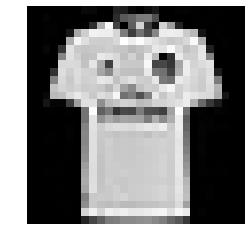

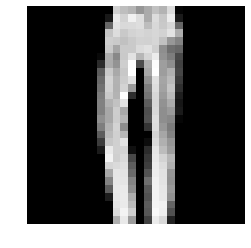

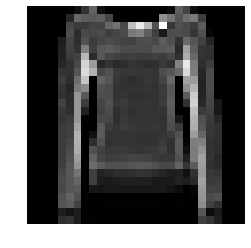

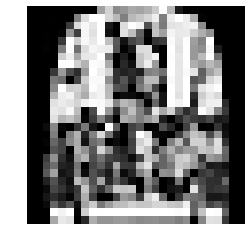

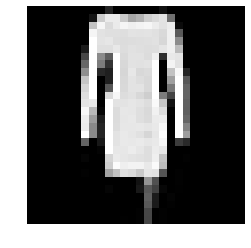

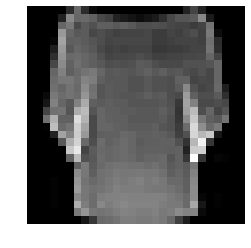

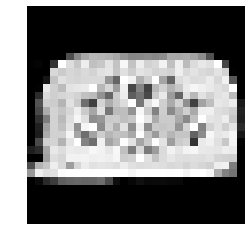

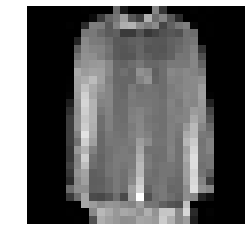

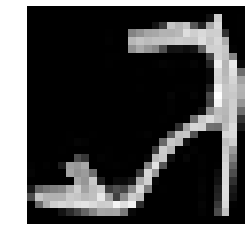

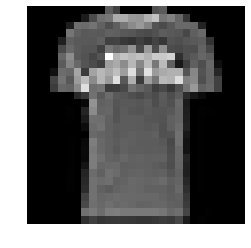

In [41]:
def visualise(X):
    for i in range(10):
        img = np.array(X[i])
        plt.imshow(img.reshape((28,28)),cmap='gray')
        plt.axis("off")
        plt.show()
visualise(X)

        

### Training and Validation Set

In [42]:
X_train = X[:8000,:]
Y_train = Y[:8000]

X_val = X[8000:,:]
Y_val = Y[8000:]

print(X_train.shape,Y_train.shape,X_val.shape,Y_val.shape)


(8000, 784) (8000, 10) (2000, 784) (2000, 10)


### One_Hot Represetation

### Feed this data into a Multilayer Perceptron

In [27]:
import tensorflow
from keras.models import Sequential
from keras.layers import Dense,Activation

Using TensorFlow backend.


In [48]:
model = Sequential()
model.add(Dense(256,input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               200960    
_________________________________________________________________
activation_3 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                16448     
_________________________________________________________________
activation_4 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [50]:
hist = model.fit(X_train,Y_train,batch_size=256,epochs=50,verbose=2,validation_data=(X_val,Y_val))

Train on 8000 samples, validate on 2000 samples
Epoch 1/50
 - 2s - loss: 2.1065 - acc: 0.2954 - val_loss: 1.8595 - val_acc: 0.4960
Epoch 2/50
 - 1s - loss: 1.6826 - acc: 0.5670 - val_loss: 1.5393 - val_acc: 0.5955
Epoch 3/50
 - 1s - loss: 1.4070 - acc: 0.6444 - val_loss: 1.3049 - val_acc: 0.6405
Epoch 4/50
 - 1s - loss: 1.2124 - acc: 0.6695 - val_loss: 1.1478 - val_acc: 0.6650
Epoch 5/50
 - 1s - loss: 1.0811 - acc: 0.6827 - val_loss: 1.0341 - val_acc: 0.6725
Epoch 6/50
 - 1s - loss: 0.9900 - acc: 0.6960 - val_loss: 0.9586 - val_acc: 0.6835
Epoch 7/50
 - 1s - loss: 0.9243 - acc: 0.7084 - val_loss: 0.8997 - val_acc: 0.6925
Epoch 8/50
 - 1s - loss: 0.8749 - acc: 0.7210 - val_loss: 0.8559 - val_acc: 0.7040
Epoch 9/50
 - 1s - loss: 0.8357 - acc: 0.7313 - val_loss: 0.8171 - val_acc: 0.7250
Epoch 10/50
 - 1s - loss: 0.8032 - acc: 0.7375 - val_loss: 0.7922 - val_acc: 0.7375
Epoch 11/50
 - 1s - loss: 0.7772 - acc: 0.7484 - val_loss: 0.7859 - val_acc: 0.7420
Epoch 12/50
 - 1s - loss: 0.7550 - ac

In [57]:
np.argmax(model.predict(X[:10]),axis=1)

array([0, 1, 2, 0, 4, 0, 8, 6, 5, 0], dtype=int64)

## Visualise Loss

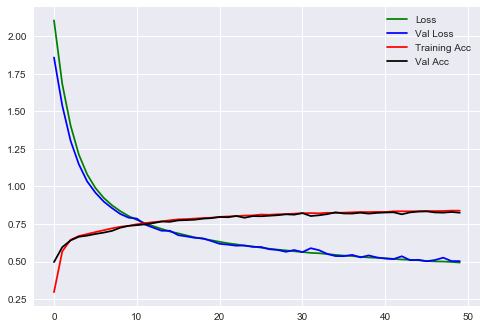

In [63]:
plt.style.use("seaborn")
plt.plot(hist.history['loss'],'g',label="Loss")
plt.plot(hist.history['val_loss'],'b',label="Val Loss")
plt.plot(hist.history['acc'],'r',label="Training Acc")
plt.plot(hist.history['val_acc'],'black',label="Val Acc")
plt.legend()
plt.show()

